# PROJETO 1 - Ciência dos Dados
 ## Ellen Beatriz Shen | 2B Engenharia

 ___

## Perguntas a serem respondidas:

**Pergunta 1:** É possível constatar que o "PIB per capita" da Espanha, em relação a países similares a ele, foi aumentado ao entrar na União Europeia? Podemos dizer que ocorreu uma evolução relativa melhor?


## Explicação da hipótese e mecanismo

A **União Europeia** é um bloco econômico e político constituido por 28 países europeus. Seus objetivos são ajudar os países-membros no seu desenvolvimento econômico, dar mais igualdade política e econômica à Europa, melhorar as condições econômicas e de trabalho dos cidadãos europeus, reduzir as desigualdades econômicas e sociais entre todas as regiões que compõem o bloco, garantir a permanência de um ambiente pacífico e harmonioso em toda a Europa. Suas características são livre circulação das pessoas pelos Estados-membros, livre circulação de mercadorias entre os Estados-membros, integração política, adoção de uma moeda única, o Euro.

- Como um dos objetivos principais da UE é o desenvolvimento econômico de seus países-membros, a hipótese busca comparar os dados de países pertencentes e não pertencentes a este bloco econômico. A análise vai ser baseada em um grupo de países que são economicamente similares, e que somente alguns entraram para a UE. Assim podemos utilizar variáveis como o 'PIB per capita' ao longo dos anos para a comparação.

## Bases de dados utilizadas

- dados retirados de https://www.gapminder.org/data/
- Variáveis:
 - PIB per capita
 - Renda


___

## Análise dos Dados 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Leitura dos Dados
PIB = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
renda = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')
mundo = pd.read_excel('WorldBank.xlsx')

In [4]:
#Trocando o indice dos dados.
dados_PIB = PIB.set_index("country")
dados_renda = renda.set_index("country")
dados_mundo = mundo.set_index("Country")

In [6]:
dados_regiao = dados_mundo.loc[:,["Country","region"]]
dataframe_regiao = dados_regiao.set_index("Country")
europa = ['Andorra',  'Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina',  'Cyprus',  'Czech Republic','Denmark', 'Spain',  'Estonia', 'Finland',  'France', 'United Kingdom',  'Greece', 'Croatia', 'Hungary', 'Ireland',  'Iceland',  'Italy',  'Lithuania', 'Latvia',  'Monaco',  'Moldova', 'Malta',  'Montenegro', 'Netherlands',  'Poland',  'Portugal',  'Romania',  'Slovak Republic', 'Slovenia',  'Sweden',  'Turkey', 'Luxembourg', 'Germany']
uniao_europeia = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']


### PIB Espanha

In [7]:
PIB_espanha = dados_PIB.loc["Spain",:]

In [8]:
#Filtro do PIB antes e depois de 1986
PIB_espanha_antes = PIB_espanha[(PIB_espanha.index>1962) & (PIB_espanha.index<1986)]
PIB_espanha_depois = PIB_espanha[(PIB_espanha.index>1986)]

- Gráfico do PIB da Espanha antes de 1986:

Text(0, 0.5, 'PIB Espanha')

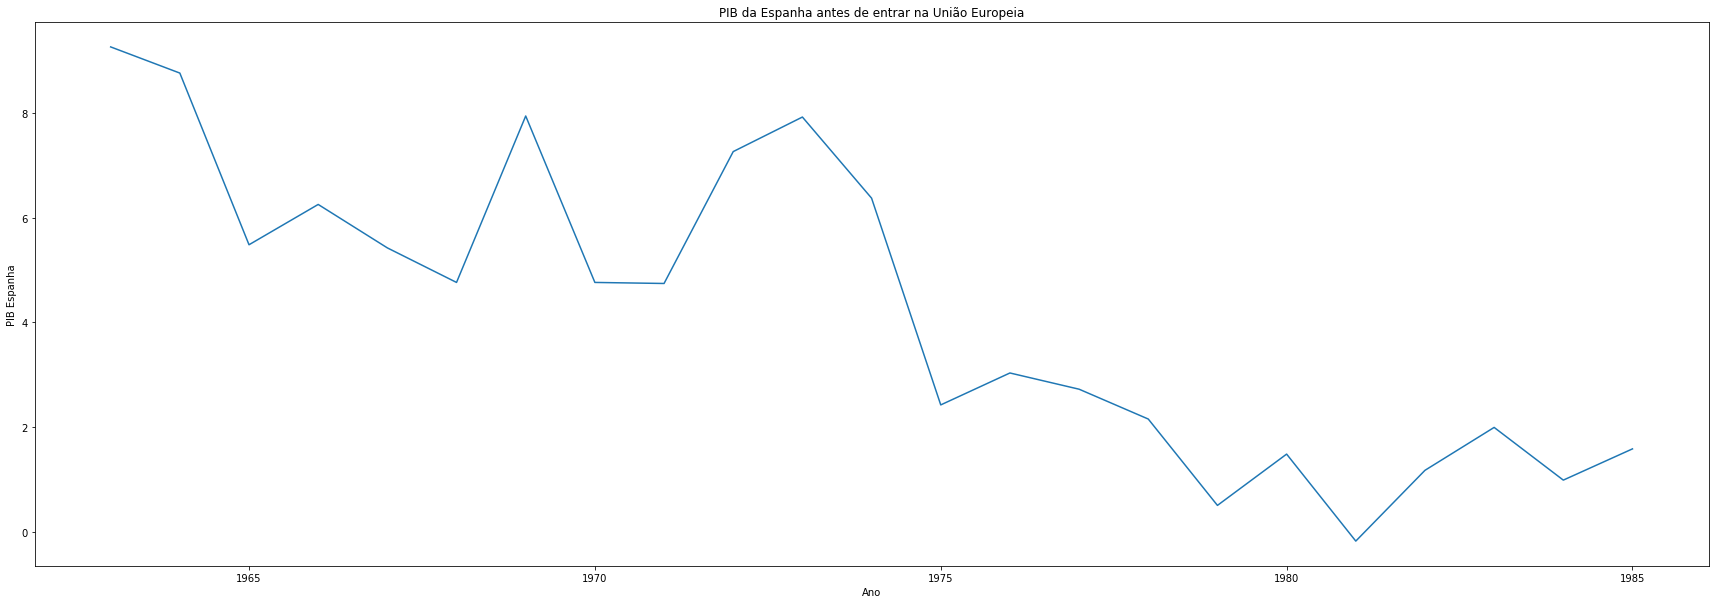

In [9]:
plt.figure(figsize=(30,10))
plt.plot(PIB_espanha_antes.index,PIB_espanha_antes)
plt.title('PIB da Espanha antes de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

- Gráfico do PIB da Espanha depois de 1986:

Text(0, 0.5, 'PIB Espanha')

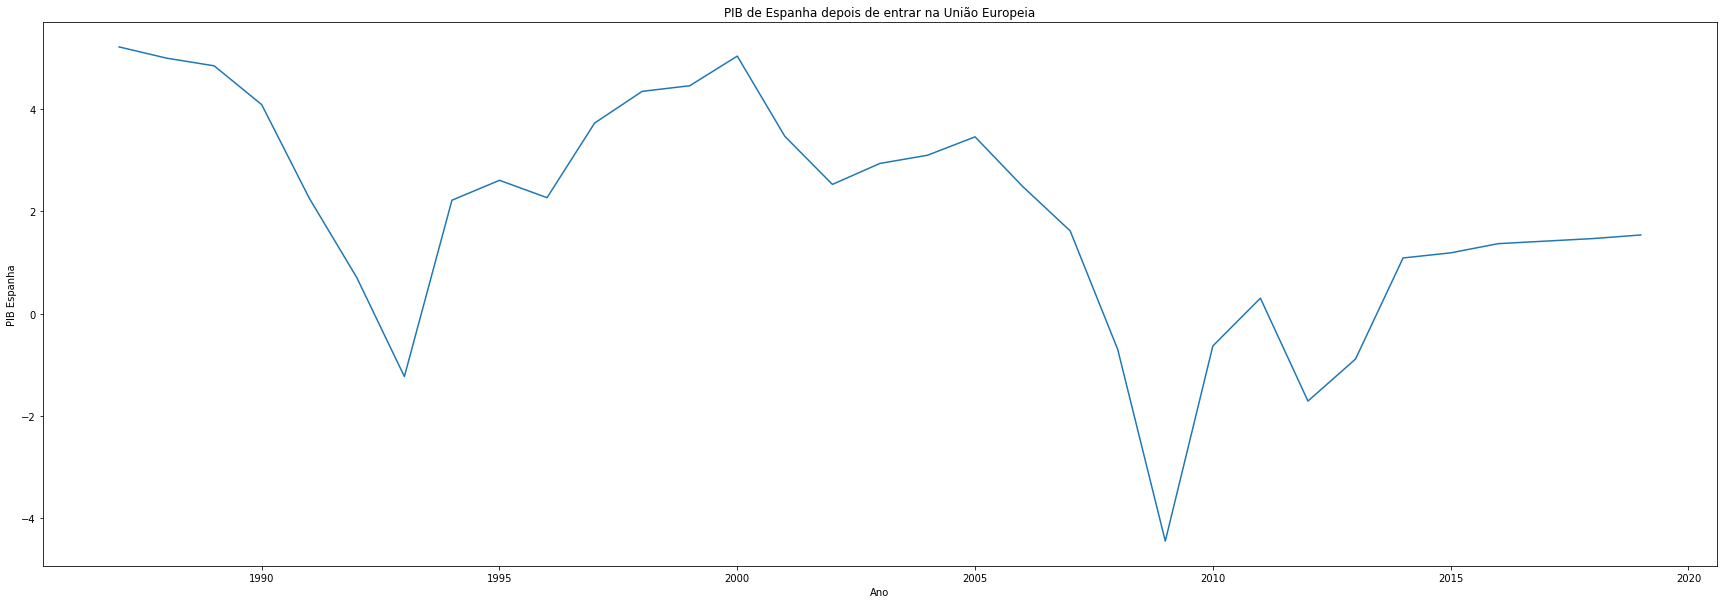

In [10]:
plt.figure(figsize=(30,10))
plt.plot(PIB_espanha_depois.index,PIB_espanha_depois)
plt.title('PIB de Espanha depois de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

- Gráfico comparando as médias do PIB per capita antes e depois:

In [11]:
#Médias antes e depois
media_PIB_antes = PIB_espanha_antes.mean()
media_PIB_depois = PIB_espanha_depois.mean()

In [12]:
dados_comparacao = {
'Época': ['Antes', 'Depois'],
'Média': [media_PIB_antes,media_PIB_depois]}
media_espanha = pd.DataFrame(dados_comparacao, columns=['Época', 'Média'])

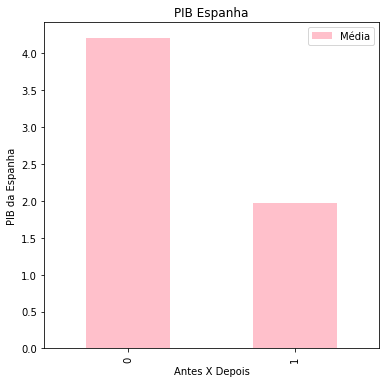

In [14]:
plot = media_espanha.plot(kind='bar',title='PIB Espanha',figsize=(6, 6),color=('pink','blue'))
plt.ylabel('PIB da Espanha')
plt.xlabel('Antes X Depois')
plt.show()

Comparar a média não é o melhor método para analisar ...

In [15]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas PIB da Espanha antes e depois da entrada da União Europeia')
    plt.xlabel('Anos')
    plt.ylabel('PIB Espanha')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

Ajuste linear entre:
Coeficiente linear: 708.0862450592886
Coeficiente angular: -0.3565750988142293
Ajuste linear entre:
Coeficiente linear: 247.88180269607844
Coeficiente angular: -0.12276905080213904


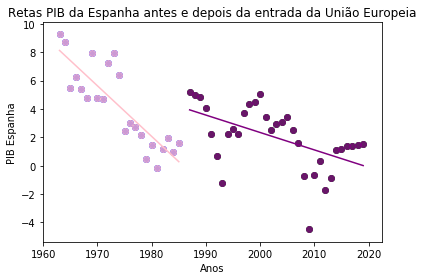

In [16]:
index_antes = PIB_espanha_antes.reset_index()
index_depois = PIB_espanha_depois.reset_index()

plt.scatter(index_antes["index"], index_antes.Spain, color="b")
reta(index_antes["index"], index_antes.Spain, "pink")
plt.scatter(index_depois["index"], index_depois.Spain, color="g")
reta(index_depois["index"], index_depois.Spain, "purple")

### PIB

In [17]:
#Filtração do PIB 
dataframe_pib_eu = dados_PIB.loc[:,"Europa"] = "não"
dataframe_pib_eu = dados_PIB.loc[europa, "Europa"] = "sim"

In [18]:
PIB_europa = dados_PIB.loc[dados_PIB.Europa=="sim",:]

### Renda

In [19]:
#Filtraçào da Renda dos países da Europa
dataframe_renda_eu = dados_renda.loc[:,"Europa"] = "não"
dataframe_renda_eu =  dados_renda.loc[europa, "Europa"] = "sim"

In [20]:
renda_europa = dados_renda.loc[dados_renda.Europa=="sim",:]

União Europeia

In [25]:
#Países da UE
dataframe_pib_ue = PIB_europa.loc[:,"União Europeia"] = "não"
dataframe_pib_ue = PIB_europa.loc[uniao_europeia, "União Europeia"] = "sim"


In [23]:
PIB_UE = PIB_europa.loc[PIB_europa["União Europeia"]=="sim",:]

In [24]:
PIB_resto = PIB_europa.loc[PIB_europa["União Europeia"]=="não",:]

### Junção do PIB e Renda

Para começar a análise, comecei filtrando os anos de 1986 e 1987 das variáveis de "PIB per capita" e "renda" de 3 países situados na europa e economicamente parecidos. E ao fazer uma junçào desses dados, podemos observar que 1 ano após a entrada de Portugal para a UE há um aumento significante em comparaçao aos outros países.

In [5]:
#PIB
PIB_1986_1987 = dados_PIB.loc[:,["country",1986,1987]]
PIB_idx = PIB_1986_1987.set_index("country")

#Renda
renda_1986 = dados_renda.loc[:,["country",1986,1987]]
renda_idx = dados_renda.set_index("country")

#Dataframe de 1986 e 1987
dataframe_1986_1987 = PIB_idx.join(renda_idx, how='inner', lsuffix='_PIB', rsuffix='_Renda')

In [6]:
dataframe_PIB = dataframe_1986_1987.loc[["Portugal","Slovak Republic","Lithuania"],["1986_PIB","1987_PIB"]]
dataframe_PIB

,1986_PIB,1987_PIB
country,,
Portugal,4.03,6.300
Slovak Republic,1.67,0.311
Lithuania,3.21,0.442


In [7]:
dataframe_renda = dataframe_1986_1987.loc[["Portugal","Slovak Republic","Lithuania"],["1986_Renda","1987_Renda"]]
dataframe_renda

,1986_Renda,1987_Renda
country,,
Portugal,16100,17100
Slovak Republic,14700,14700
Lithuania,15800,15900


Porém, para fazer uma melhor análise seria adequada uma base com mais anos antes e depois de sua entrada para a UE. Então devemos fazer um filtro desses dados para cada país, a fim de poder utilizar gráficos para melhor comparação.

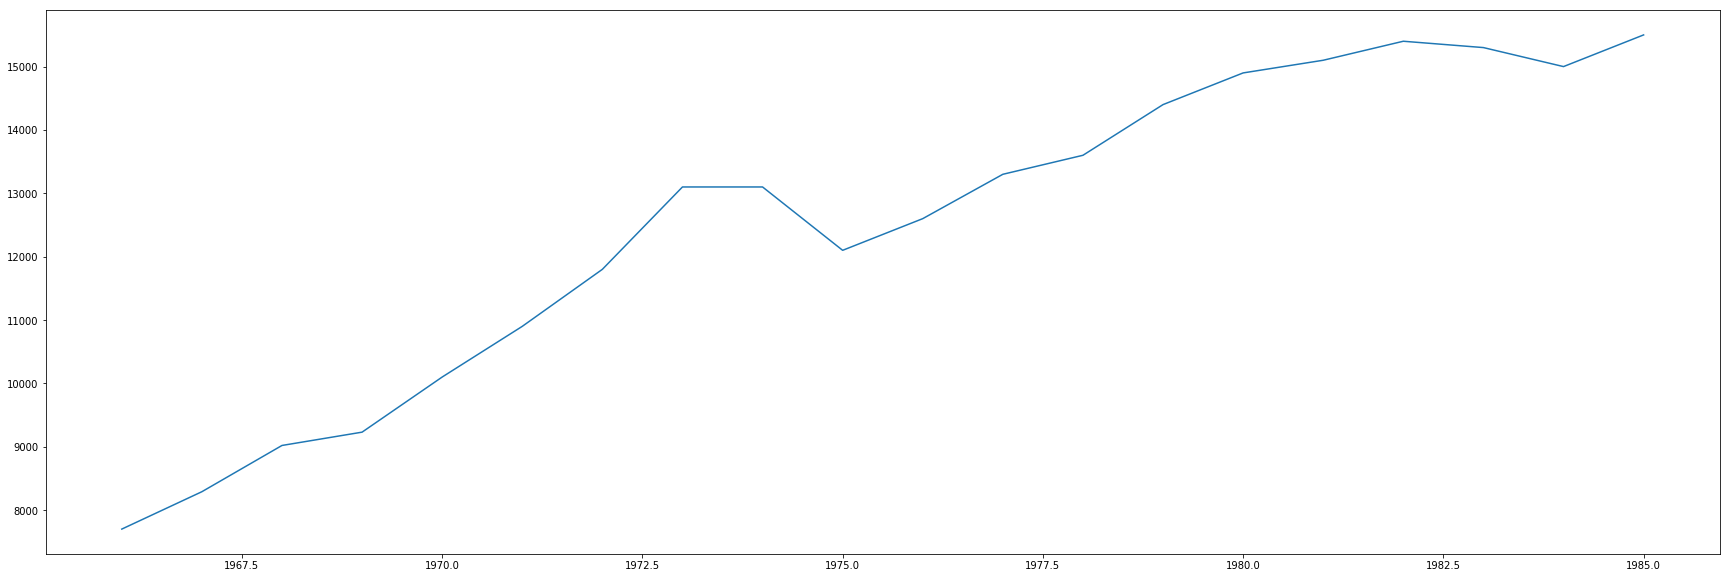

In [19]:
#sabendo que o ano de 1986 é a coluna de índice 187, posso fazer um slice para filtrar os anos.

#PIB
PIB_portugal_antes = PIB_portugal.iloc[:,167:187]
PIB_portugal_depois = PIB_portugal.iloc[:,187:207]

#Renda
renda_portugal_antes = renda_portugal.iloc[:,167:187]
renda_portugal_depois = renda_portugal.iloc[:,187:207]

#Visualização de como os dados ficam
media_renda_port = renda_portugal_antes.mean()
x = media_renda_port.index
plt.figure(figsize=(30,10))
plt.plot(x,media_renda_port)

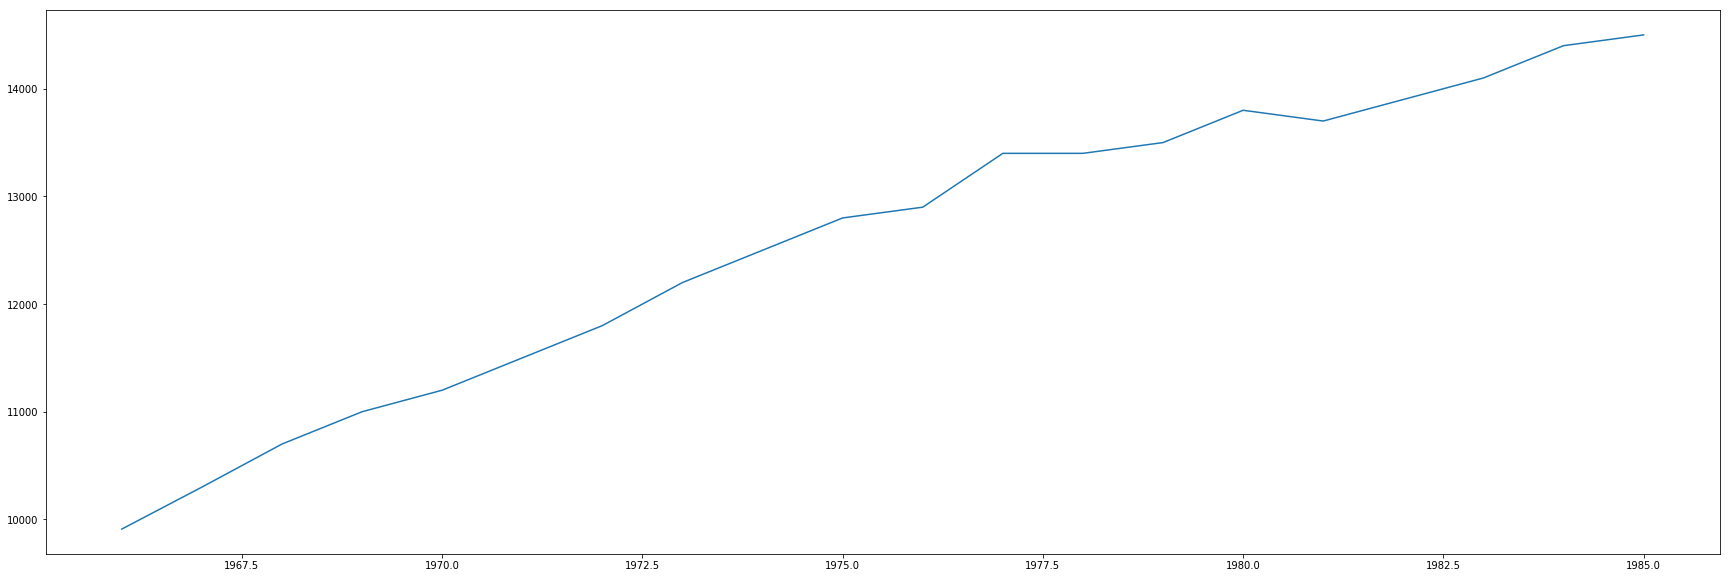

In [20]:
#PIB
PIB_eslovaquia_antes = PIB_eslovaquia.iloc[:,167:187]
PIB_eslovaquia_depois = PIB_eslovaquia.iloc[:,187:207]

#Renda
renda_eslovaquia_antes = renda_eslovaquia.iloc[:,167:187]
renda_eslovaquia_depois = renda_eslovaquia.iloc[:,187:207]

media_renda_eslovaquia = renda_eslovaquia_antes.mean()
x1 = media_renda_eslovaquia.index
plt.figure(figsize=(30,10))
plt.plot(x1, media_renda_eslovaquia)

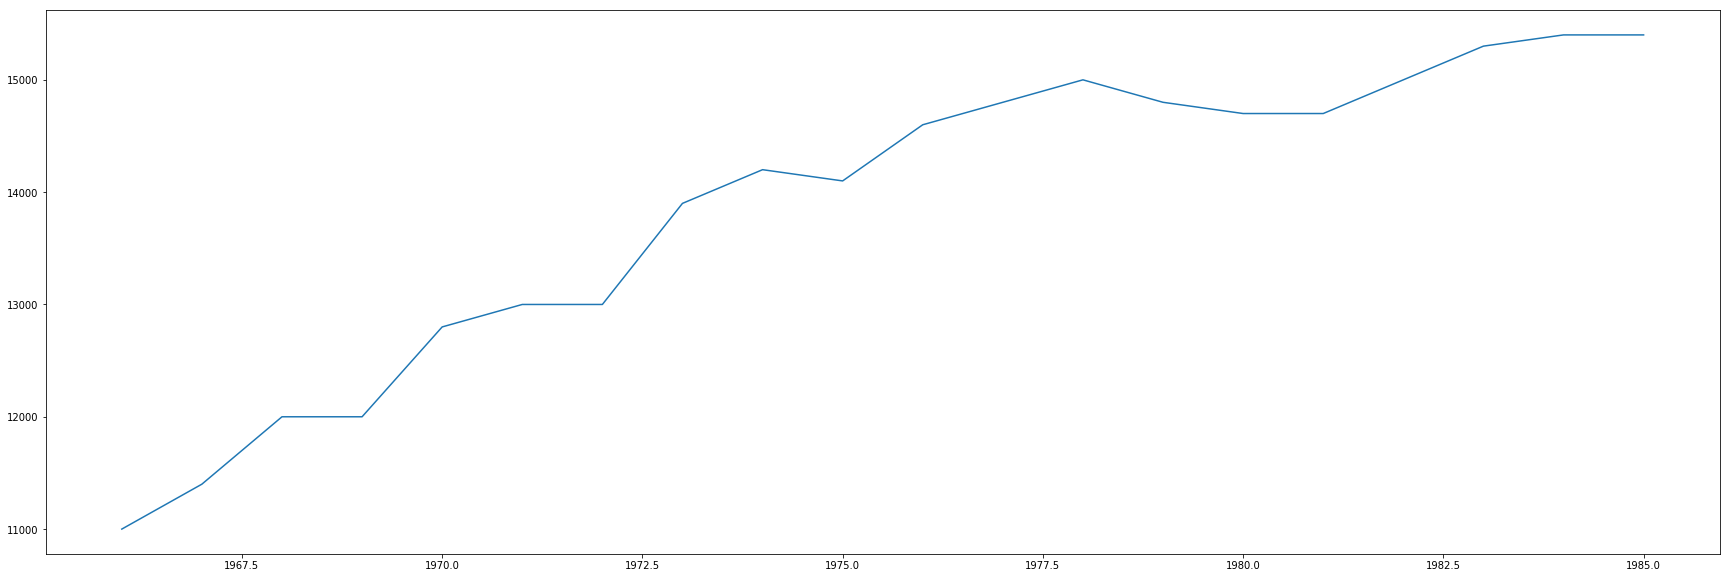

In [21]:
#PIB
PIB_lituania_antes = PIB_lituania.iloc[:,167:187]
PIB_lituania_depois = PIB_lituania.iloc[:,187:207]

#Renda
renda_lituania_antes = renda_lituania.iloc[:,167:187]
renda_lituania_depois = renda_lituania.iloc[:,187:207]

media_renda_lit = renda_lituania_antes.mean()
x2 = media_renda_lit.index
plt.figure(figsize=(30,10))
plt.plot(x2, media_renda_lit)